In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations, permutations
from tqdm import tqdm

In [75]:
data_array = pd.read_csv("delay_data_e_02.csv",index_col=0)
end_times = pd.read_csv("delay_ends_e_02.csv",index_col=0)

In [76]:
jammed_idx = data_array.index[data_array['type'] == 0].values
jammedOut = data_array.drop(jammed_idx)

In [77]:
ensemble_averaged = jammedOut.groupby(['delay','time']).mean()
averaged_error = jammedOut.groupby(['delay','time']).var()

In [67]:
jammedOut[jammedOut['delay'] == 1000][jammedOut['energy'] == -1]['meansign'].mean()
# ensemble_averaged.loc[1000]['meansign']

<ipython-input-67-7c5384edc794>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jammedOut[jammedOut['delay'] == 1000][jammedOut['energy'] == -1]['meansign'].mean()


0.7621052631578948

In [78]:
delays = np.unique(jammedOut['delay'].values)

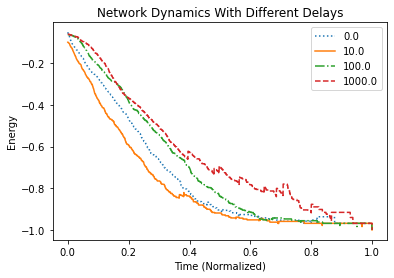

In [79]:
linestyles = [':','-','-.','--',':']
for y,delay in enumerate(delays):
  plt.plot(np.arange(len(ensemble_averaged.loc[delay]))/len(ensemble_averaged.loc[delay]),
           ensemble_averaged.loc[delay]['energy'].values,
           label=delay,
           linestyle=linestyles[y])
plt.title("Network Dynamics With Different Delays")
plt.xlabel("Time (Normalized)")
plt.ylabel("Energy")
plt.legend()
# plt.show()
plt.savefig("energy_time_n_e_02.jpg",dpi=250)

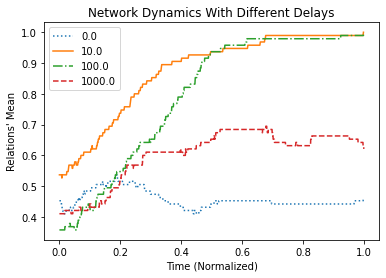

In [74]:
linestyles = [':','-','-.','--',':']
for y,delay in enumerate(delays):
  plt.plot(np.arange(len(ensemble_averaged.loc[delay]))/len(ensemble_averaged.loc[delay]),
           ensemble_averaged.loc[delay]['meansign'].values,
           label=delay,
           linestyle=linestyles[y])
plt.title("Network Dynamics With Different Delays")
plt.xlabel("Time (Normalized)")
plt.ylabel("Relations' Mean")
plt.legend()
# plt.show()
plt.savefig("mean_time_n_e_02.jpg",dpi=250)

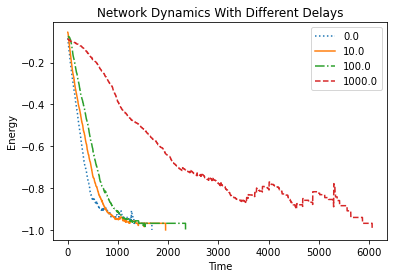

In [68]:
linestyles = [':','-','-.','--',':']
for y,delay in enumerate(delays[:]):
  plt.plot(ensemble_averaged.loc[delay].index.values,ensemble_averaged.loc[delay]['energy'].values,label=delay,linestyle=linestyles[y])
plt.title("Network Dynamics With Different Delays")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
# plt.show()
plt.savefig("energy_time_e_02.jpg",dpi=250)

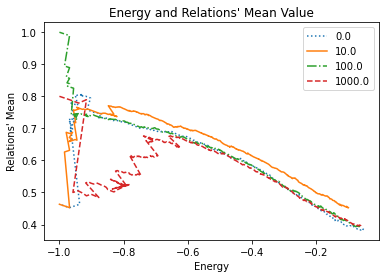

In [80]:
linestyles = [':','-','-.','--',':']
for y,delay in enumerate(delays[:]):
  plt.plot(ensemble_averaged.loc[delay]['energy'].values,ensemble_averaged.loc[delay]['meansign'].values,label=delay,linestyle=linestyles[y])
plt.title("Energy and Relations' Mean Value")
plt.xlabel("Energy")
plt.ylabel("Relations' Mean")
plt.legend()
# plt.show()
plt.savefig("energy_rmean_e_02.jpg",dpi=250)

### Jammed Plot

In [25]:
to_plot = data_array[data_array['delay'] == 10000]

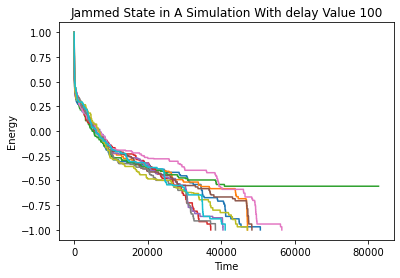

In [26]:
for e in np.unique(to_plot['ens']):
    y = to_plot[to_plot['ens'] == e]
    plt.plot(y['time'],y['energy'])
plt.title("Jammed State in A Simulation With delay Value 100")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.savefig("energy_time_jammed_10000.jpg",dpi=150)

In [ ]:
to_

### Dynamics Plots With Error

In [125]:
ensemble_averaged['error'] = averaged_error.values
ensemble_averaged.dropna(inplace=True)

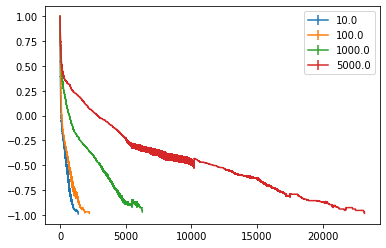

In [126]:
for delay in delays[:]:
  plt.errorbar(ensemble_averaged.loc[delay].index.values,
               ensemble_averaged.loc[delay]['energy'].values,
               yerr=ensemble_averaged.loc[delay]['error'].values,
               label=delay,
               )
plt.legend()
plt.show()

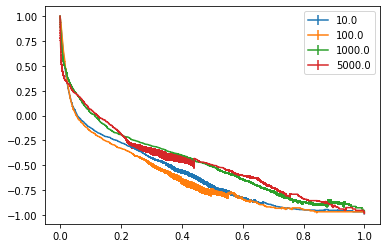

In [127]:
for delay in delays[:]:
  plt.errorbar(np.arange(len(ensemble_averaged.loc[delay]))/len(ensemble_averaged.loc[delay]),
               ensemble_averaged.loc[delay]['energy'].values,
               yerr=ensemble_averaged.loc[delay]['error'].values,
               label=delay,
               )
plt.legend()
plt.show()

### Time To Balance Fit

In [27]:
final_time_avg = jammedOut.groupby(['energy','delay']).mean()
final_time_err = jammedOut.groupby(['energy','delay']).var()

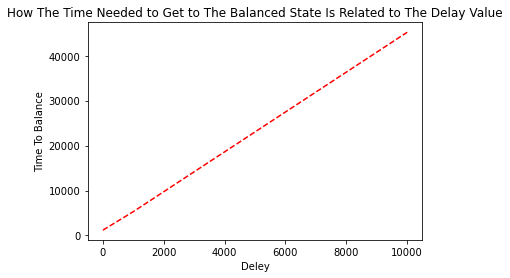

In [40]:
plt.plot(final_time_avg.loc[-1].index.values,final_time_avg.loc[-1]['time'].values,ls="--",color="red")
plt.xlabel("Deley")
plt.ylabel("Time To Balance")
plt.title("How The Time Needed to Get to The Balanced State Is Related to The Delay Value")
plt.savefig("bt_delay_relation.jpg",dpi=150)

In [32]:
np.polyfit(final_time_avg.loc[-1].index.values,final_time_avg.loc[-1]['time'].values,deg = 1)

array([   4.40700989, 1118.81514398])

In [29]:
final_time_avg.loc[-1]

,ens,time,meansign,type
delay,,,,
0.0,4.500000,1243.500000,-0.034737,1.0
10.0,4.777778,1230.222222,-0.037427,1.0
100.0,4.500000,1581.100000,-0.038947,1.0
1000.0,4.500000,5288.800000,-0.030526,1.0
10000.0,4.777778,45212.333333,-0.023392,1.0


In [83]:
hyb = pd.read_table("mixed_dynamics_50_0.000000_1.000000")

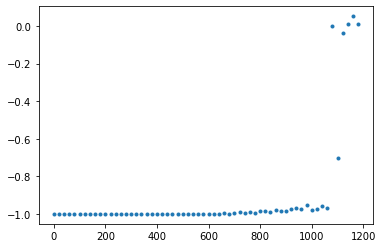

In [96]:
plt.plot(hyb['Temperature'],hyb['Mean'],'.')

In [91]:
hyb2 = pd.read_table("mixed_dynamics_50_1.000000_1.000000")

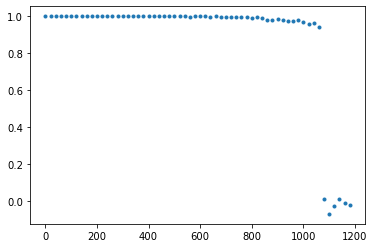

In [95]:
plt.plot(hyb2['Temperature'],hyb2['Mean'],'.')

In [97]:
hyb51 = pd.read_table("mixed_dynamics_51_0.500000_1.000000")

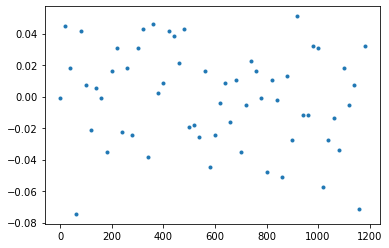

In [98]:
plt.plot(hyb51['Temperature'],hyb51['Mean'],'.')